In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
all_data_values = pd.DataFrame()
all_data_generation = pd.DataFrame()
all_data_individual = pd.DataFrame()
for i in range(1,10):
    db_path = "database_"+str(i)+"/db.sqlite"
    print(db_path)
    con = sqlite3.connect(db_path)
    cur = con.cursor()
    res = cur.execute("SELECT * FROM float")
    names = list(map(lambda x: x[0], cur.description))
    values = res.fetchall()
    values = pd.DataFrame(values,columns=names)
    values['run_num'] = i

    res = cur.execute("SELECT * FROM ea_optimizer_generation")
    names = list(map(lambda x: x[0], cur.description))
    generation = res.fetchall()
    generation = pd.DataFrame(generation,columns=names)
    generation['run_num'] = i

    res = cur.execute("SELECT * FROM ea_optimizer_individual")
    names = list(map(lambda x: x[0], cur.description))
    individual = res.fetchall()
    individual = pd.DataFrame(individual,columns=names)
    individual['run_num'] = i
    con.close()
    all_data_values = all_data_values.append(values)
    all_data_generation = all_data_generation.append(generation)
    all_data_individual = all_data_individual.append(individual)
    

database_1/db.sqlite


/tmp/ipykernel_67091/4208118142.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data_values = all_data_values.append(values)
/tmp/ipykernel_67091/4208118142.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data_generation = all_data_generation.append(generation)
/tmp/ipykernel_67091/4208118142.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data_individual = all_data_individual.append(individual)


database_2/db.sqlite


/tmp/ipykernel_67091/4208118142.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data_values = all_data_values.append(values)
/tmp/ipykernel_67091/4208118142.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data_generation = all_data_generation.append(generation)
/tmp/ipykernel_67091/4208118142.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data_individual = all_data_individual.append(individual)


database_3/db.sqlite


/tmp/ipykernel_67091/4208118142.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data_values = all_data_values.append(values)
/tmp/ipykernel_67091/4208118142.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data_generation = all_data_generation.append(generation)
/tmp/ipykernel_67091/4208118142.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data_individual = all_data_individual.append(individual)


database_4/db.sqlite


/tmp/ipykernel_67091/4208118142.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data_values = all_data_values.append(values)
/tmp/ipykernel_67091/4208118142.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data_generation = all_data_generation.append(generation)
/tmp/ipykernel_67091/4208118142.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data_individual = all_data_individual.append(individual)


database_5/db.sqlite


/tmp/ipykernel_67091/4208118142.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data_values = all_data_values.append(values)
/tmp/ipykernel_67091/4208118142.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data_generation = all_data_generation.append(generation)
/tmp/ipykernel_67091/4208118142.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data_individual = all_data_individual.append(individual)


database_6/db.sqlite


/tmp/ipykernel_67091/4208118142.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data_values = all_data_values.append(values)
/tmp/ipykernel_67091/4208118142.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data_generation = all_data_generation.append(generation)
/tmp/ipykernel_67091/4208118142.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data_individual = all_data_individual.append(individual)


database_7/db.sqlite


/tmp/ipykernel_67091/4208118142.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data_values = all_data_values.append(values)
/tmp/ipykernel_67091/4208118142.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data_generation = all_data_generation.append(generation)
/tmp/ipykernel_67091/4208118142.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data_individual = all_data_individual.append(individual)


database_8/db.sqlite


/tmp/ipykernel_67091/4208118142.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data_values = all_data_values.append(values)
/tmp/ipykernel_67091/4208118142.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data_generation = all_data_generation.append(generation)
/tmp/ipykernel_67091/4208118142.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data_individual = all_data_individual.append(individual)


database_9/db.sqlite


/tmp/ipykernel_67091/4208118142.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data_values = all_data_values.append(values)
/tmp/ipykernel_67091/4208118142.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data_generation = all_data_generation.append(generation)
/tmp/ipykernel_67091/4208118142.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data_individual = all_data_individual.append(individual)


In [11]:
fmix = all_data_generation.set_index('individual_id','run_num').join(all_data_individual.set_index('individual_id','run_num'),lsuffix='l')
fmix
full = fmix.set_index('float_id','run_num',).join(all_data_values.set_index('id','run_num'),lsuffix='l')
full['bone_size_avg'] = full['bone_size_sum']/full['bone_count']

/tmp/ipykernel_67091/1251806050.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.set_index except for the argument 'keys' will be keyword-only.
  fmix = all_data_generation.set_index('individual_id','run_num').join(all_data_individual.set_index('individual_id','run_num'),lsuffix='l')
/tmp/ipykernel_67091/1251806050.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.set_index except for the argument 'keys' will be keyword-only.
  fmix = all_data_generation.set_index('individual_id','run_num').join(all_data_individual.set_index('individual_id','run_num'),lsuffix='l')
/tmp/ipykernel_67091/1251806050.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.set_index except for the argument 'keys' will be keyword-only.
  full = fmix.set_index('float_id','run_num',).join(all_data_values.set_index('id','run_num'),lsuffix='l')
/tmp/ipykernel_67091/1251806050.py:3: FutureWarning: In a future version of pandas all argum

In [12]:
full.columns
cols = 'generation_index','age', 'inverse_age',\
       'birth', 'speed_y', 'speed_x',\
       'relative_speed_y', 'displacement', 'average_z', 'head_balance',\
       'modules_count', 'hinge_count', 'brick_count', 'bone_count',\
       'bone_size_sum', 'hinge_prop', 'brick_prop', 'branching_count',\
       'branching_prop', 'extremities', 'extensiveness', 'extremities_prop',\
       'extensiveness_prop', 'width', 'height', 'coverage', 'proportion',\
       'symmetry', 'hinge_ratio', 'run_num','bone_size_avg'

In [17]:
plot_data_max['bone_size_avg'].max()*1.5

0.30000000000000004

/home/bobykhani/.local/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/bobykhani/.local/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/bobykhani/.local/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/bobykhani/.local/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/bobykhani/.local/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/bobykhani/.local/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty s

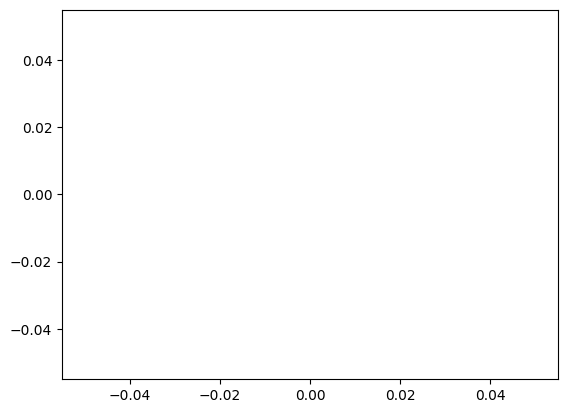

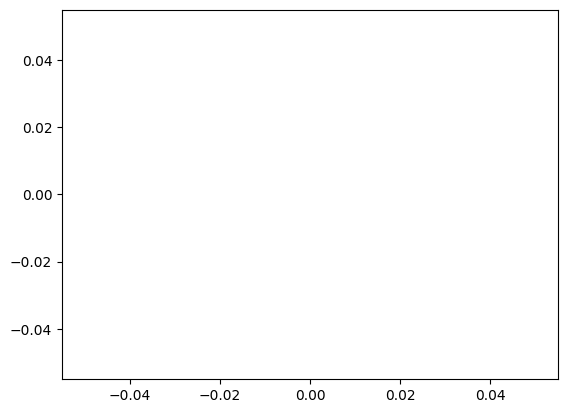

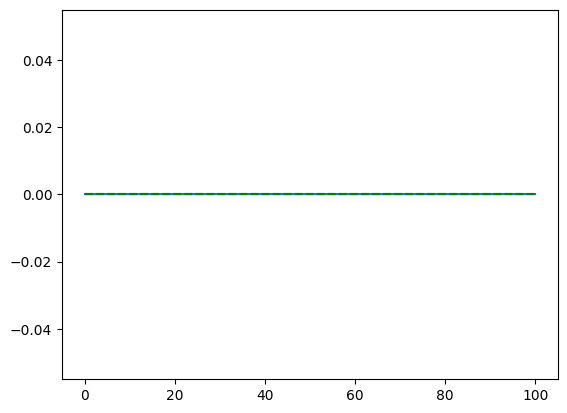

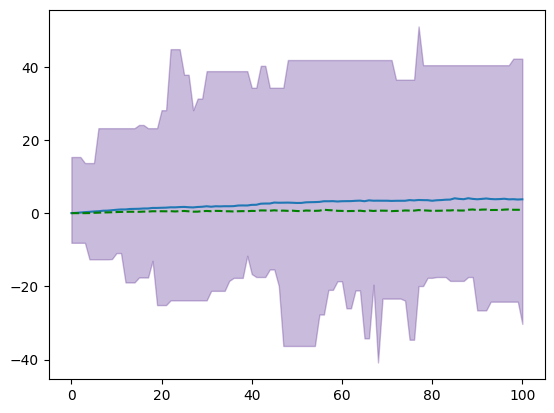

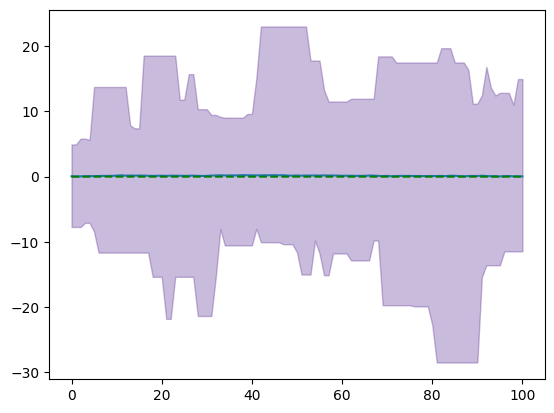

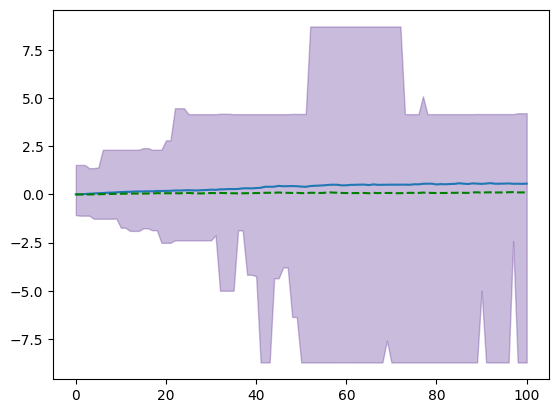

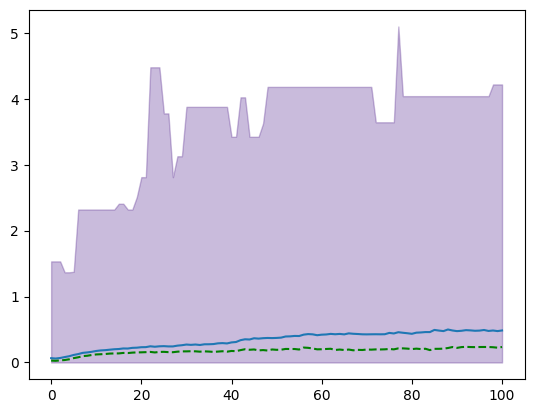

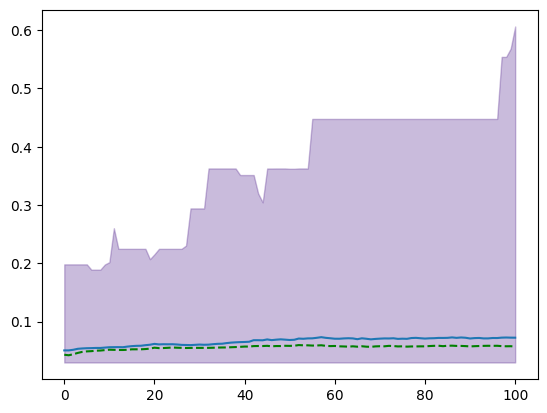

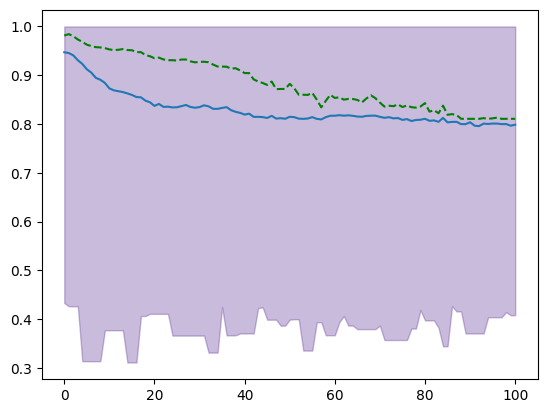

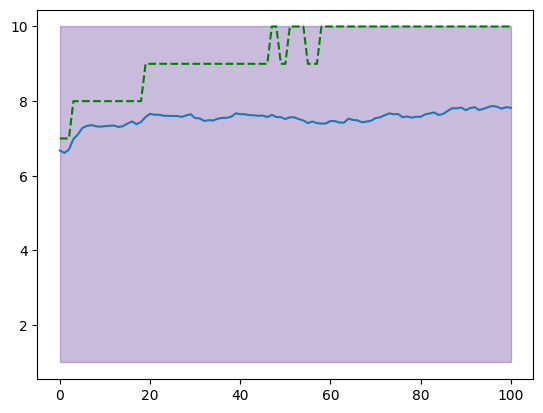

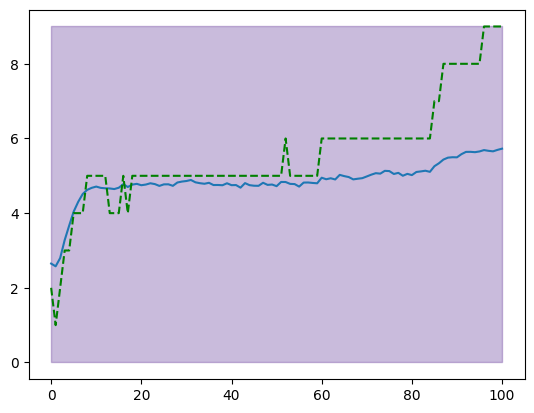

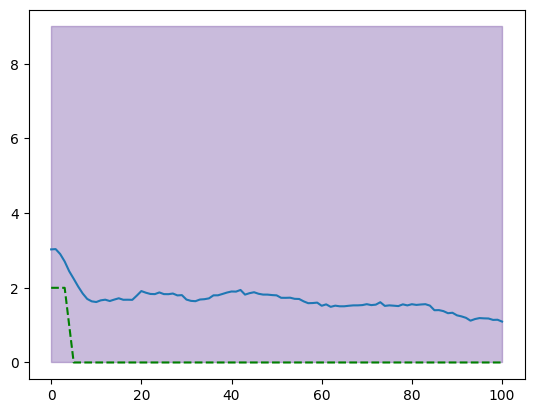

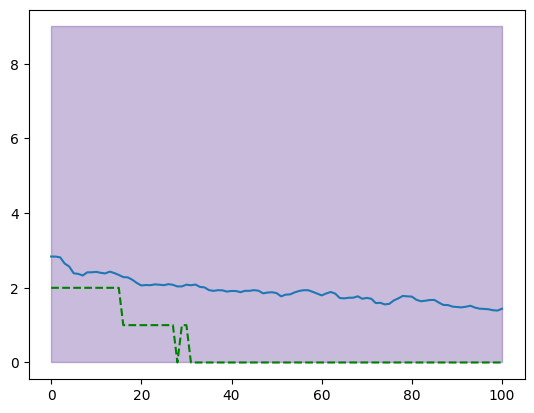

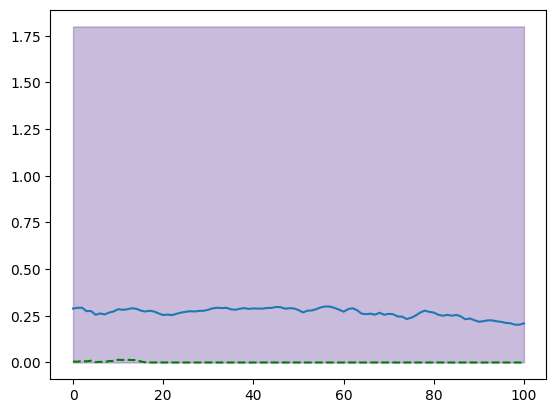

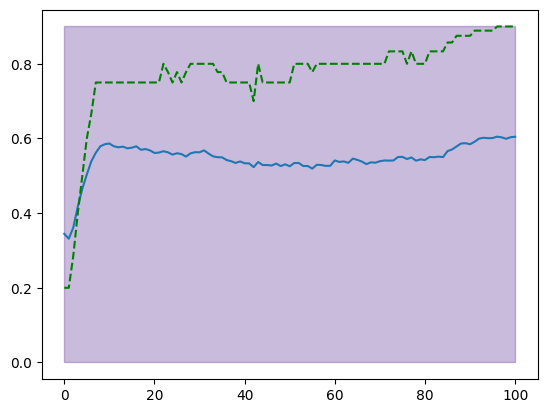

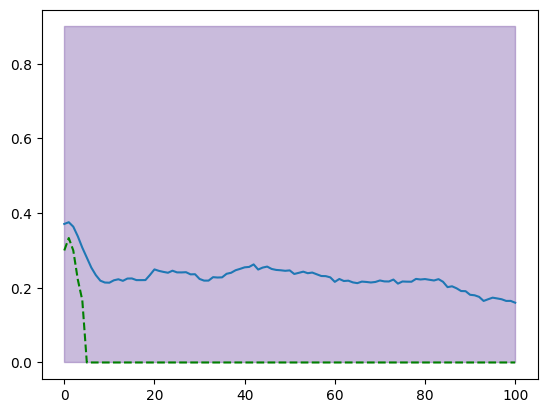

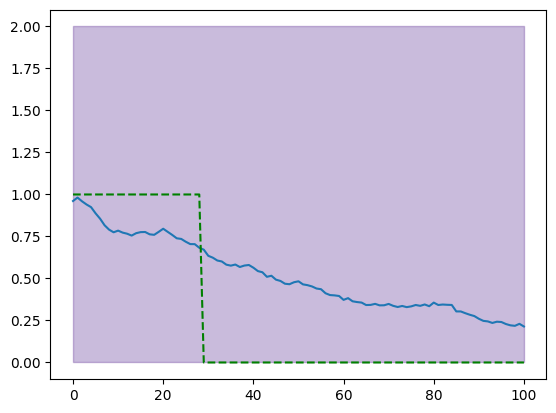

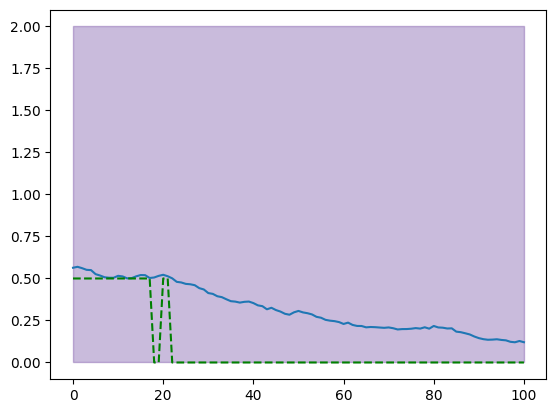

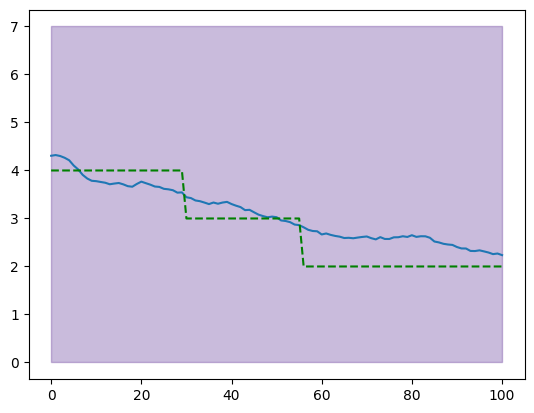

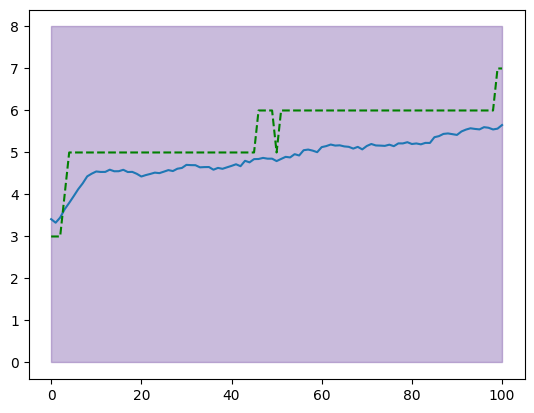

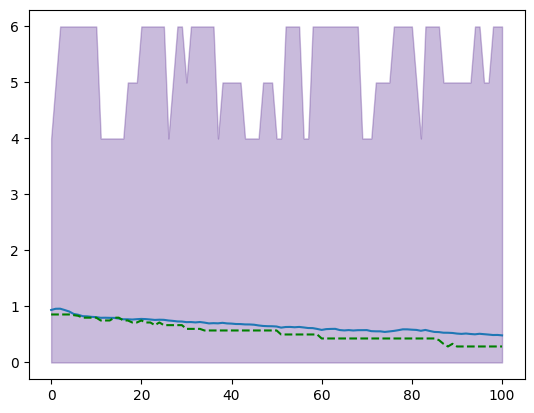

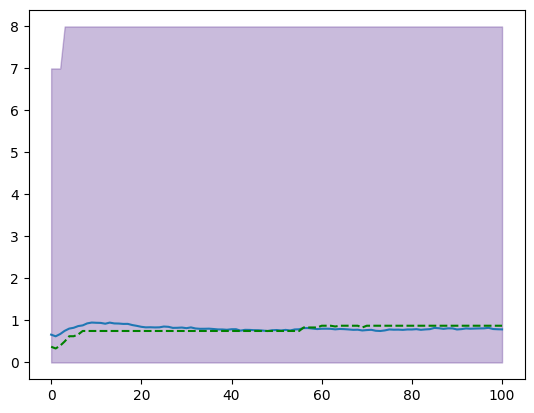

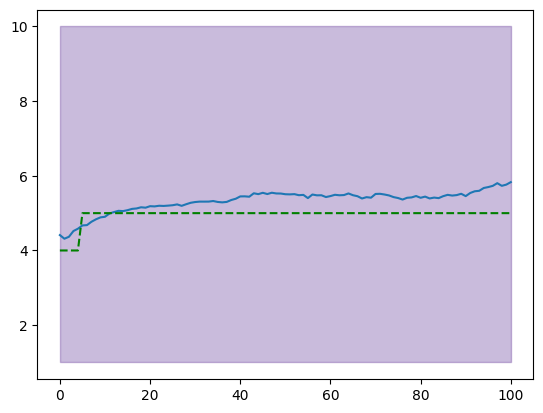

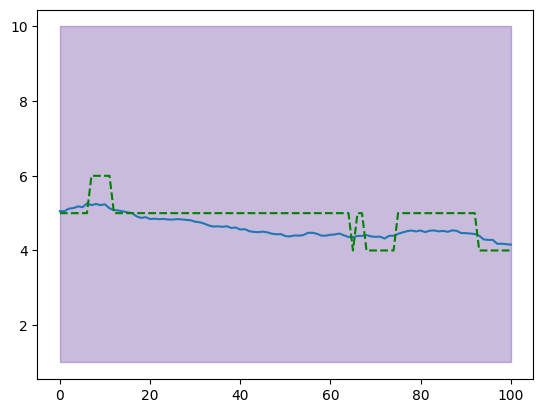

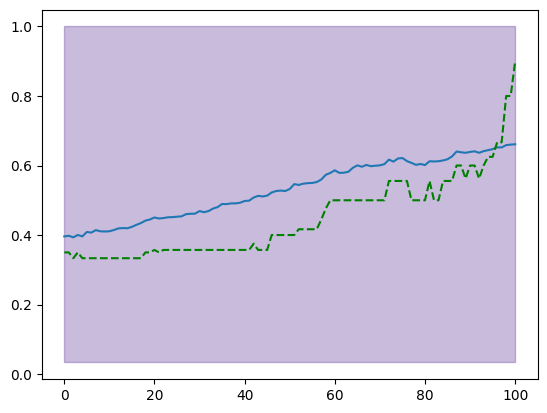

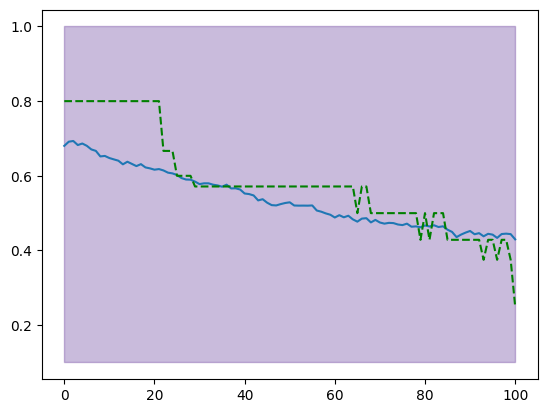

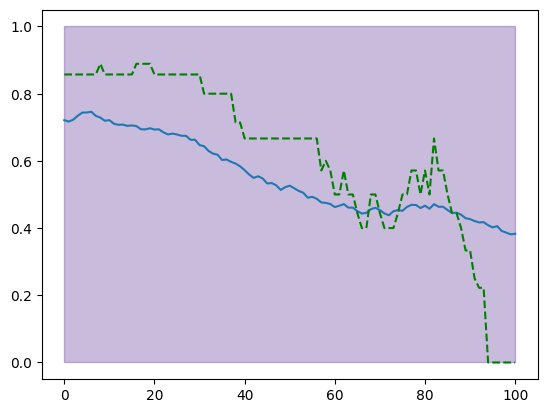

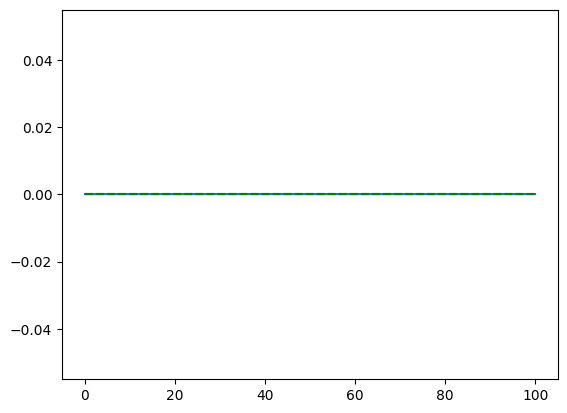

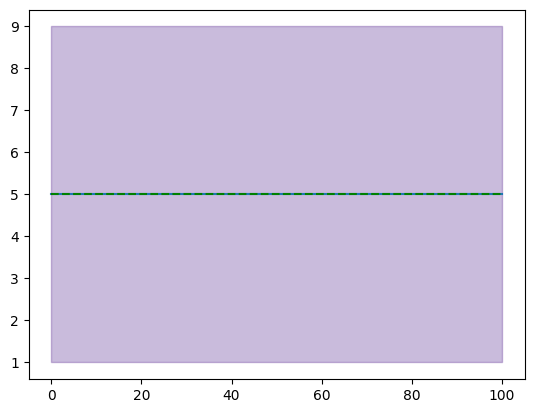

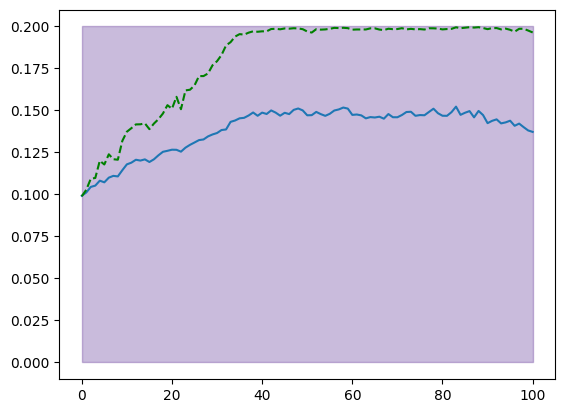

In [22]:
#measure = 'height'
for i in cols:
    try:
        clr = plt.cm.Purples(0.9)
        plot_data_min = full[['generation_index',i]].groupby(['generation_index']).min()
        plot_data_max = full[['generation_index',i]].groupby(['generation_index']).max()
        plot_data = full[['generation_index',i]].groupby(['generation_index']).mean()
        plot_data_median = full[['generation_index',i]].groupby(['generation_index']).median()
        fig=plt.figure()
        ax = fig.add_subplot(111)
        ax.plot(plot_data.index,plot_data[i],label = 'mean')
        ax.plot(plot_data_median.index,plot_data_median[i],label = 'median',color='green',linestyle='dashed')
        ax.fill_between(plot_data[i].index, plot_data_min[i], plot_data_max[i], alpha=0.3, edgecolor=clr, facecolor=clr)
        #aplt.plot(plot_data_min.index,plot_data_min[i],label = 'min')
        # plt.plot(plot_data_max.index,plot_data_max[i],label = 'max')
        ax.set_ylim([plot_data_min[i]-2.5,plot_data_max[i]*1.5])
        #plt.update_layout(yaxis_range=[plot_data_min[i].min()-2.5,plot_data_max[i].max()*1.5])
        
        plt.title(i)
        #plt.title = i
        #plt.show()
        plt.savefig('plots/'+i+'.png')
        plt.show()
    except:
        continue

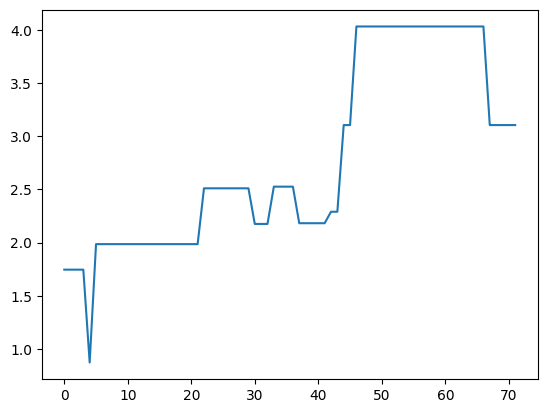

In [54]:
plot_data = full[['generation_index','value']].groupby(['generation_index']).max()
plt.plot(plot_data.index,plot_data['value'])